### Forecast experiment 1 - Sine wave, version 2

**This version uses actual train/val/test -split for data + TensorFlow datasets instead of the deprecated generators.**

Notes from your instructor: Even though the code runs fairly same, the dataset seems to have some differences when compared to TimeseriesGenerator, making the migration a bit difficult at the moment. For now, it's fine if time series generators are used, even though they are deprecated.

See also the other example for TimeseriesGenerators vs TF datasets for the electricity data forecast example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

import keras
seed = 101
keras.utils.set_random_seed(seed)

In [2]:
# create X/y -data, ranging from 0-200 (with 0.5)
# sin-wave as the data
X_train = np.arange(0, 100, 0.5) 
y_train = np.sin(X_train)

X_val = np.arange(100, 200, 0.5) 
y_val = np.sin(X_val)

X_test = np.arange(200, 300, 0.5) 
y_test = np.sin(X_test)

# number of variables is just 1 (the sinewave)
n_features = 1

# use reshape tools to get the data ready for future use
train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))
val_series = y_val.reshape((len(y_val), n_features))

In [3]:
# expected data format => a list of lists with each value as a separate list
# usually the NumPy -reshape above handles this
train_series

array([[ 0.        ],
       [ 0.47942554],
       [ 0.84147098],
       [ 0.99749499],
       [ 0.90929743],
       [ 0.59847214],
       [ 0.14112001],
       [-0.35078323],
       [-0.7568025 ],
       [-0.97753012],
       [-0.95892427],
       [-0.70554033],
       [-0.2794155 ],
       [ 0.21511999],
       [ 0.6569866 ],
       [ 0.93799998],
       [ 0.98935825],
       [ 0.79848711],
       [ 0.41211849],
       [-0.07515112],
       [-0.54402111],
       [-0.87969576],
       [-0.99999021],
       [-0.87545217],
       [-0.53657292],
       [-0.0663219 ],
       [ 0.42016704],
       [ 0.80378443],
       [ 0.99060736],
       [ 0.93489506],
       [ 0.65028784],
       [ 0.20646748],
       [-0.28790332],
       [-0.71178534],
       [-0.96139749],
       [-0.97562601],
       [-0.75098725],
       [-0.34248062],
       [ 0.14987721],
       [ 0.60553987],
       [ 0.91294525],
       [ 0.99682979],
       [ 0.83665564],
       [ 0.471639  ],
       [-0.00885131],
       [-0

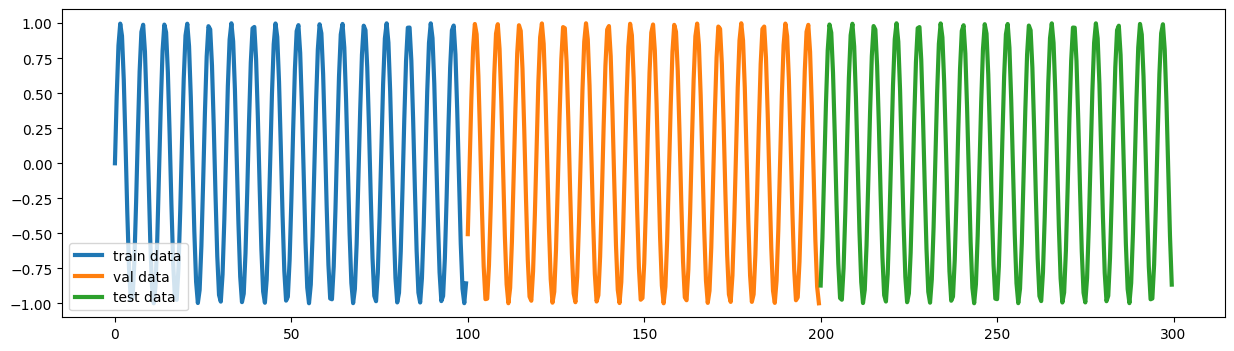

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=3, label='train data')
ax.plot(X_val,y_val, lw=3, label='val data')
ax.plot(X_test, y_test,  lw=3, label='test data')
ax.legend(loc="lower left")
plt.show()

In [5]:
from tensorflow.keras.utils import timeseries_dataset_from_array

look_back  = 20
batch_size = 10

train_generator = timeseries_dataset_from_array(
    data=train_series,
    targets=train_series[look_back:],
    sequence_length=look_back,
    sampling_rate=1,
    sequence_stride=1,
    batch_size=batch_size,
    shuffle=False,
)

test_generator = timeseries_dataset_from_array(
    data=test_series,
    targets=test_series[look_back:],
    sequence_length=look_back,
    sampling_rate=1,
    sequence_stride=1,
    batch_size=batch_size,
    shuffle=False,
)

val_generator = timeseries_dataset_from_array(
    data=val_series,
    targets=val_series[look_back:],
    sequence_length=look_back,
    sampling_rate=1,
    sequence_stride=1,
    batch_size=batch_size,
    shuffle=False,
)


In [6]:
from keras.models import Sequential
from keras import Input
from keras.layers import LSTM
from keras.layers import Dense

# build the neural network
# in this case, LSTM with 8 neurons
n_neurons  = 8

model = Sequential()
model.add(LSTM(n_neurons, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

initial_weights = model.get_weights()

model.fit(train_generator, epochs=100, verbose=1, validation_data=val_generator)

Epoch 1/100


c:\Users\tuomas.valtanen\DL2025lecturenotes2\DeepLearning2025\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4542 - val_loss: 0.4331
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4195 - val_loss: 0.3949
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3751 - val_loss: 0.3439
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3151 - val_loss: 0.2747
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2354 - val_loss: 0.1855
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1402 - val_loss: 0.0897
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0549 - val_loss: 0.0240
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0045
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9261e-04 - v

**Training metrics**

<Axes: >

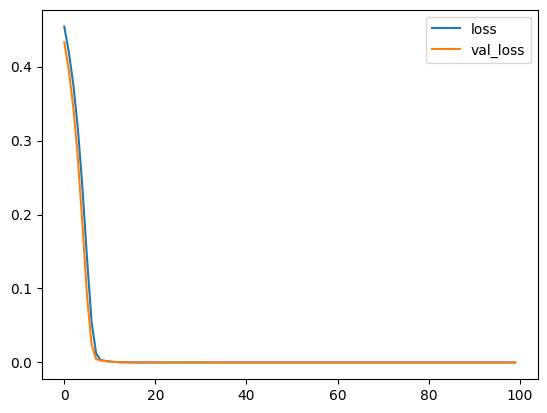

In [7]:
# the usual training metrics visualization
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [8]:
# TensorFlow evaluation metrics
result = model.evaluate(train_generator)
print(f"Training loss: {result}")

# test loss
result = model.evaluate(test_generator)
print(f"Testing loss: {result}")

# these values are very close to each other, 
# which means our model is quite optimal
# IN THEORY 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3784e-06 
Training loss: 5.3783955991093535e-06
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3805e-06 
Testing loss: 5.380504717322765e-06


**Test predictions**

In [9]:
# create test predictions
test_predictions  = model.predict(test_generator)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


**Visualize all**

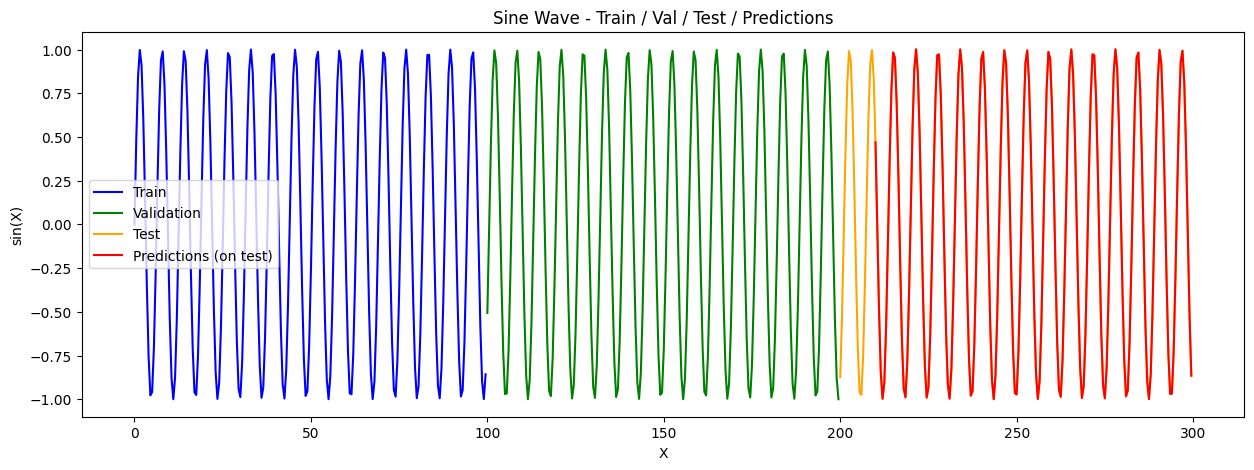

In [10]:
# Compute the x-axis for the predictions
# because predictions start after look_back samples
pred_x = X_test[look_back:]

# Plot everything
plt.figure(figsize=(15, 5))
plt.plot(X_train, y_train, label='Train', color='blue')
plt.plot(X_val, y_val, label='Validation', color='green')
plt.plot(X_test, y_test, label='Test', color='orange')
plt.plot(pred_x, test_predictions, label='Predictions (on test)', color='red')

plt.legend()
plt.title("Sine Wave - Train / Val / Test / Predictions")
plt.xlabel("X")
plt.ylabel("sin(X)")
plt.show()


**Conventional regression metrics + MAPE**

In [11]:
# let's make a separate copy of the test values
# so we can calculate some errors

actual_y_test = np.concatenate([y for x, y in test_generator])
errors = np.abs(actual_y_test - test_predictions)
mape = mean_absolute_percentage_error(actual_y_test, test_predictions) * 100

# print out the MAPE-score
print("MAPE (mean average precision error):")
print(f"{round(mape, 2)} %")

# MAE - Mean average error
print("\nMAE")
print(round(metrics.mean_absolute_error(actual_y_test, test_predictions), 2), "units")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(actual_y_test, test_predictions), 2), "units^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(actual_y_test, test_predictions)), 2), "units")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(actual_y_test, test_predictions), 2))

MAPE (mean average precision error):
0.74 %

MAE
0.0 units

MSE
0.0 units^2

RMSE:
0.0 units

R-squared:
1.0


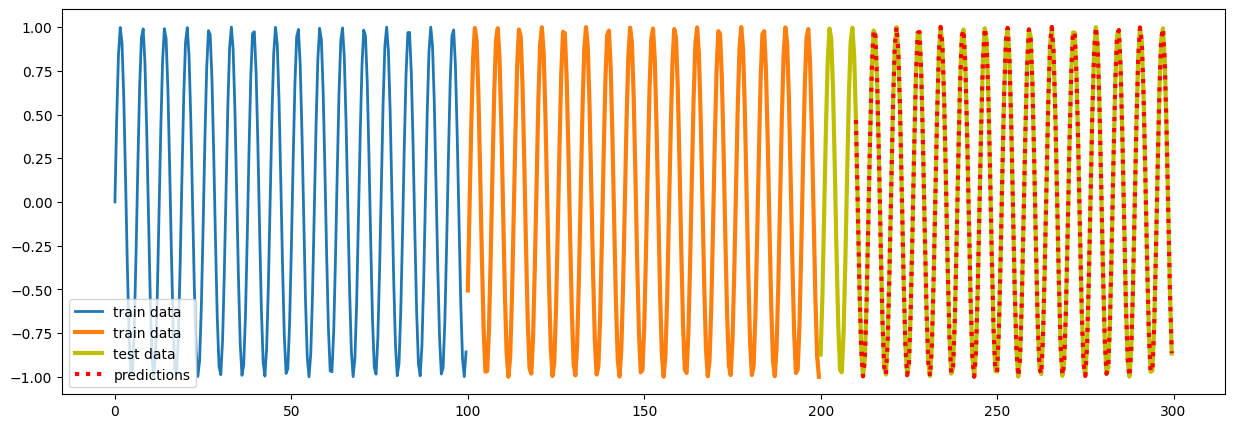

In [12]:
# visualize predictions compared to test dataset
# seems the trends are almost identical
x = np.arange(210,300, 0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train, y_train, lw=2, label='train data')
ax.plot(X_val,y_val, lw=3, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();

**Extrapolation into the future**

In [13]:
# EXTRAPOLATION TEST 1 - 180 new points
extrapolation = []
seed_batch = y_test[:look_back].reshape((1, look_back, n_features))
current_batch = seed_batch

for _ in range(180):
    predicted_value = model.predict(current_batch, verbose=0)  # shape (1,1)
    extrapolation.append(predicted_value[0,0])  # save scalar
    predicted_value = predicted_value.reshape((1,1,1))
    current_batch = np.concatenate([current_batch[:,1:,:], predicted_value], axis=1)

extrapolation = np.array(extrapolation)

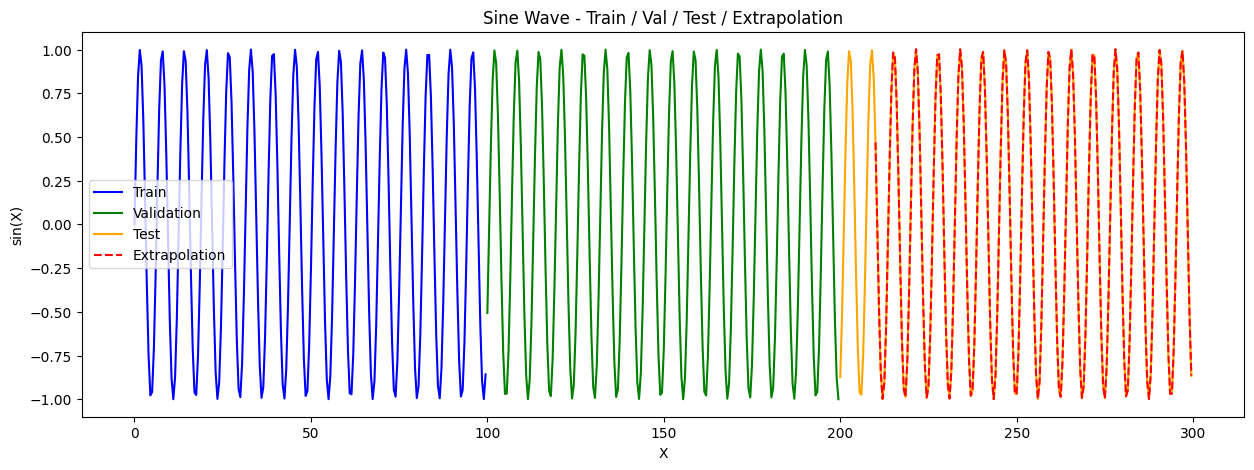

In [14]:
# Step size
step = X_test[1] - X_test[0]  # 0.5

# Extrapolation starts at X_test[look_back] (offset by look_back)
extrap_x = np.arange(X_test[look_back], X_test[look_back] + 180 * step, step)

plt.figure(figsize=(15,5))
plt.plot(X_train, y_train, label='Train', color='blue')
plt.plot(X_val, y_val, label='Validation', color='green')
plt.plot(X_test, y_test, label='Test', color='orange')
plt.plot(extrap_x, extrapolation, label='Extrapolation', color='red', linestyle='--')

plt.legend()
plt.title("Sine Wave - Train / Val / Test / Extrapolation")
plt.xlabel("X")
plt.ylabel("sin(X)")
plt.show()



In [15]:
# EXTRAPOLATION TEST 1 - 180 new points
extrapolation = []
seed_batch = y_test[:look_back].reshape((1, look_back, n_features))
current_batch = seed_batch

for _ in range(320):
    predicted_value = model.predict(current_batch, verbose=0)  # shape (1,1)
    extrapolation.append(predicted_value[0,0])  # save scalar
    predicted_value = predicted_value.reshape((1,1,1))
    current_batch = np.concatenate([current_batch[:,1:,:], predicted_value], axis=1)

extrapolation = np.array(extrapolation)

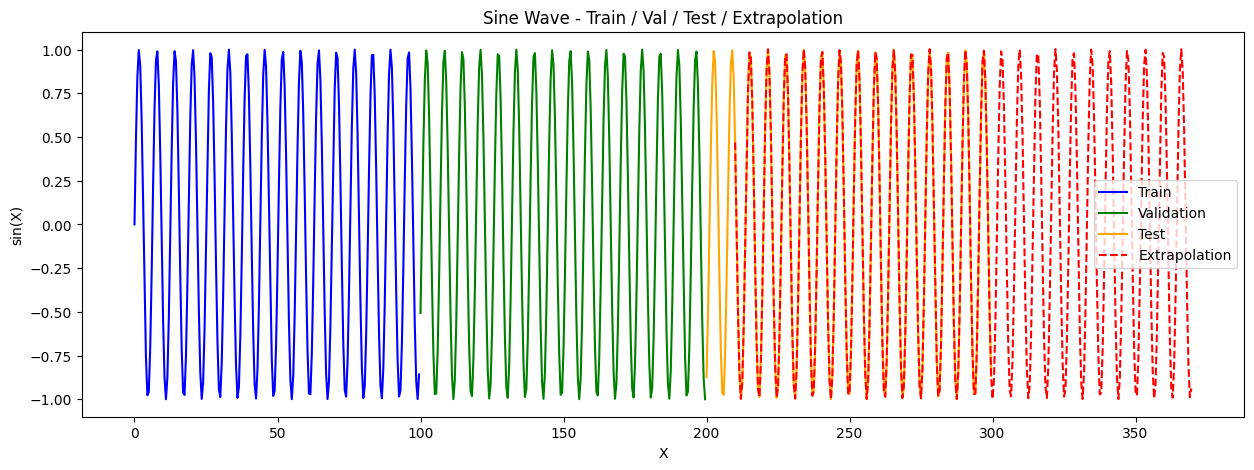

In [16]:
# Step size
step = X_test[1] - X_test[0]  # 0.5

# Extrapolation starts at X_test[look_back] (offset by look_back)
extrap_x = np.arange(X_test[look_back], X_test[look_back] + 320 * step, step)

plt.figure(figsize=(15,5))
plt.plot(X_train, y_train, label='Train', color='blue')
plt.plot(X_val, y_val, label='Validation', color='green')
plt.plot(X_test, y_test, label='Test', color='orange')
plt.plot(extrap_x, extrapolation, label='Extrapolation', color='red', linestyle='--')

plt.legend()
plt.title("Sine Wave - Train / Val / Test / Extrapolation")
plt.xlabel("X")
plt.ylabel("sin(X)")
plt.show()

